In [26]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
df = pd.read_csv(r"C:\Users\Nikita\spam.csv", encoding='latin1')

In [28]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
data = df[['v1' , 'v2']]
data.columns = ['label', 'data']

In [30]:
data.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
data['label'] = data['label'].apply(lambda x:1 if x == 'spam' else 0 )

C:\Users\Nikita\AppData\Local\Temp\ipykernel_18560\464398764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].apply(lambda x:1 if x == 'spam' else 0 )


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   data    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [33]:
X = data['data']
Y = data['label']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [35]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, Y_train)

LogisticRegression()

In [36]:
y_train_pred = logreg_model.predict(X_train_tfidf)
y_test_pred = logreg_model.predict(X_test_tfidf)

In [37]:
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_accuracy

0.9773390172761948

In [38]:
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_accuracy

0.967713004484305

In [40]:
cm = confusion_matrix(Y_test, y_test_pred)
cm

array([[964,   1],
       [ 35, 115]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

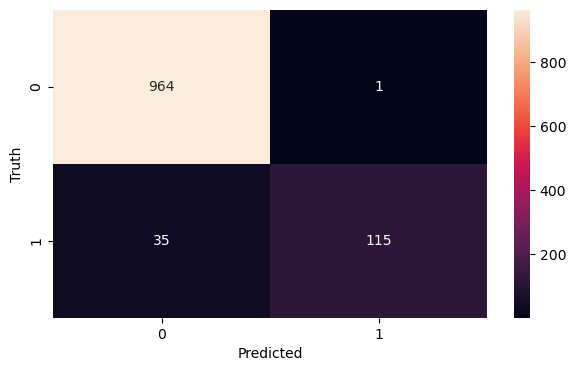

In [47]:
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
import tkinter as tk
from tkinter import messagebox
from sklearn.feature_extraction.text import TfidfVectorizer

def classify_message(message):
    message_vectorized = tfidf_vectorizer.transform([message])
    # Predict using the pre-trained model
    prediction = logreg_model.predict(message_vectorized)
    return prediction[0]

def classify_button_click():
    message = entry.get()
    prediction_window = tk.Toplevel(window)
    prediction_window.title("Prediction")
    prediction_window.geometry("300x200+{}+{}".format(int(window.winfo_screenwidth()/2 - 150), int(window.winfo_screenheight()/2 - 100)))
    prediction_window.configure(bg='lightgreen')
    if message:
        result = classify_message(message)
        if (result == 1):
            message_label = tk.Label(prediction_window, text="Beware! The message is a SPAM", padx=20, pady=20)
            message_label.pack()
        else:
            message_label = tk.Label(prediction_window, text="The message is not a SPAM", padx=20, pady=20)
            message_label.pack()
    else:
        messagebox.showwarning("Warning", "Please enter a message.")

# main window
window = tk.Tk()
window.title("Spam/Ham Classifier")
window.geometry("400x300+{}+{}".format(int(window.winfo_screenwidth()/2 - 200 ), int(window.winfo_screenheight()/2 - 150)))
window.configure(bg='lightblue')

# message entry widget
entry = tk.Text(window, width=40, height=5)
entry.pack(pady=40)

# button
classify_button = tk.Button(window, text="Classify", command=classify_button_click)
classify_button.pack(pady=10)


window.mainloop()
